Student IDs: 222303/s230951/s223190

# 2.8

*a)* Formulation of boundary value problem

To find the Neumann boundary condition on the left and bottom edge we use the divergence theorem. The divergence theorem i given by
\begin{align*}
\iint_\Omega \nabla \cdot F \ dxdy = \int_\Gamma n \cdot F ds
\end{align*}
where $F$ is some vector field, $\nabla = \left( \frac{\partial}{\partial x} , \frac{\partial}{\partial y}\right)^\top$ and $n(x,y)$ is the normal vector at $(x,y) \in \Gamma$. The PDE we want to solve is given by
\begin{align*}
u_{xx} + u_{yy} = - \tilde{q}
\end{align*}
Note that $u_{xx} + u_{yy} = \nabla \cdot \nabla u$ such that
\begin{align*}
\nabla \cdot \nabla u = - \tilde{q}
\end{align*}
We integrate both sides over the domain $\Omega$
\begin{align*}
\iint_\Omega \nabla \cdot \nabla u \ dxdy = \iint_\Omega (- \tilde{q}) \ dxdy
\end{align*}
We see that we can use the divergence theorem on the left hand side. To do it on the right hand side aswell we search for a function $g$ such that $\nabla \cdot g = - \tilde{q}$. Then we have
\begin{align*}
\iint_\Omega \nabla \cdot \nabla u \ dxdy &= \iint_\Omega \nabla \cdot g \ dxdy \\[10pt]
\Rightarrow \int_\Gamma n \cdot \nabla u \ ds &= \int_\Gamma n \cdot g \ ds
\end{align*}
We can now skip the integral to get
\begin{align*}
n \cdot \nabla u = n \cdot g
\end{align*}
The left hand side is the directional derivative in direction $n$, which is the one needed for the Neumann boundary condition. We now find the function $g$, we know that
\begin{align*}
\nabla \cdot g = - \tilde{q} = - 2 \pi \cos(\pi x) \cos(\pi y)
\end{align*}
One can show that
\begin{align*}
 g(x,y) = \begin{bmatrix} - \pi \sin(\pi x) \cos(\pi y) \\ - \pi \cos(\pi x) \sin(\pi y) \end{bmatrix}
\end{align*}
will satisfy the equation above. Then we have the directional derivative
\begin{align*}
n \cdot \nabla u = n \cdot \begin{bmatrix} - \pi \sin(\pi x) \cos(\pi y) \\ - \pi \cos(\pi x) \sin(\pi y) \end{bmatrix}
\end{align*}
on the left boundary $n = (-1,0)^\top$ and $x=0$ in this case $n \cdot \nabla u = 0$, and on the bottom boundary we have $n = (0,-1)^\top$ and $y=0$ in this case $n \cdot \nabla u = 0$ hence
\begin{align*}
    n \cdot \nabla u = 0 \ \text{on} \ \Gamma_1
\end{align*}

In this case, $q = 0$ for any $(x,y)\in \Gamma_1$ as the function is symmetric about both x and y axis, so we don't implement the Neumann conditions in the driver functions to save computation time. An implementation using Neumann conditions is found in $\texttt{FEMsolver2d}$. 

*b)* Solve problem for $[0,1]\times [0,1]$

In [13]:
import numpy as np
import matplotlib.pyplot as plt

from driver28b import Driver28b
from driver28c import Driver28c
from FEMsolver2d import *

In [14]:
(x0,y0) = (0,0)
L1 = 1
L2 = 1

noelms1 = 3
noelms2 = 3

lam1 = 1
lam2 = 1

qt = lambda x,y: 2*np.pi*np.pi*np.cos(np.pi*x)*np.cos(np.pi*y)
f = lambda x,y: np.cos(np.pi*x)*np.cos(np.pi*y)

VX, VY, EToV, u = Driver28b(x0, y0, L1, L2, noelms1, noelms2, lam1, lam2, f, qt)

2D plot of the solution:

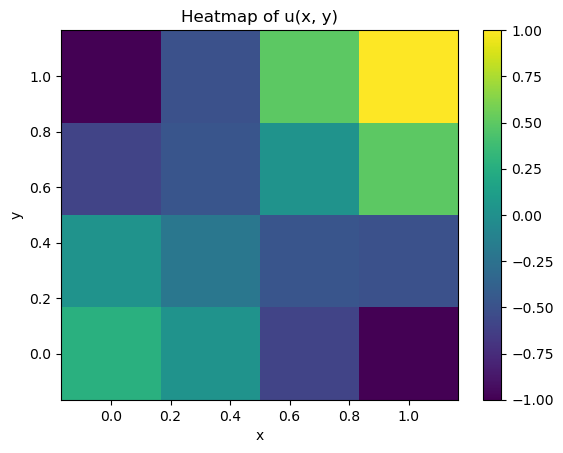

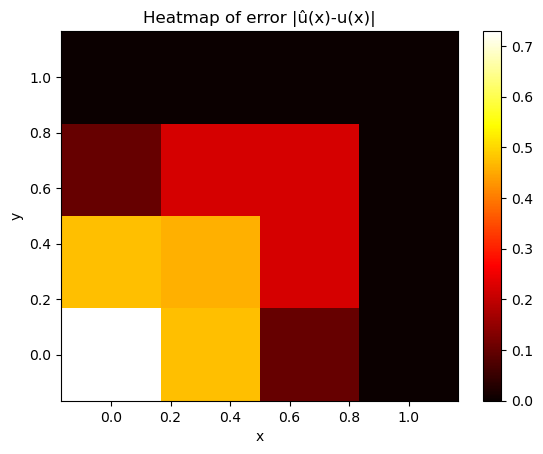

In [15]:
ufun = lambda x,y: np.cos(np.pi*x)*np.cos(np.pi*y)
plot_heatmap(u,VX,VY,ufun)

Finally, we perform a convergence test. 

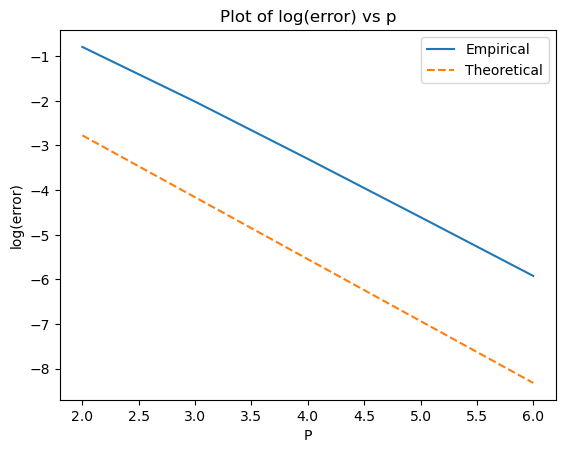

In [16]:
P = list(range(2,7))
error = np.zeros(len(P))
ufun = lambda x,y: np.cos(np.pi*x)*np.cos(np.pi*y)

for i,p in enumerate(P):
    noelms1 = 2**p
    noelms2 = 2**p

    VX, VY, EToV, u = Driver28b(x0, y0, L1, L2, noelms1, noelms2, lam1, lam2, f, qt)
    u_exact = ufun(VX,VY)
    error[i] = np.linalg.norm(u-u_exact, np.inf)


plt.plot(P,np.log(error), label='Empirical')
plt.plot(P,-2*np.log(2)*np.array(P),'--', label='Theoretical')
plt.title(r"Plot of log(error) vs p")
plt.xlabel('P')
plt.ylabel('log(error)')
plt.legend()
plt.show()

Everything appears to be in order.

*c)* Solve original problem

In [17]:
(x0,y0) = (-1,-1)
L1 = 2
L2 = 2

noelms1 = 6
noelms2 = 6

lam1 = 1
lam2 = 1

qt = lambda x,y: 2*np.pi*np.pi*np.cos(np.pi*x)*np.cos(np.pi*y)
f = lambda x,y: np.cos(np.pi*x)*np.cos(np.pi*y)

VX, VY, EToV, u = Driver28c(x0, y0, L1, L2, noelms1, noelms2, lam1, lam2, f, qt)

We plot u(x,y) in 2D:

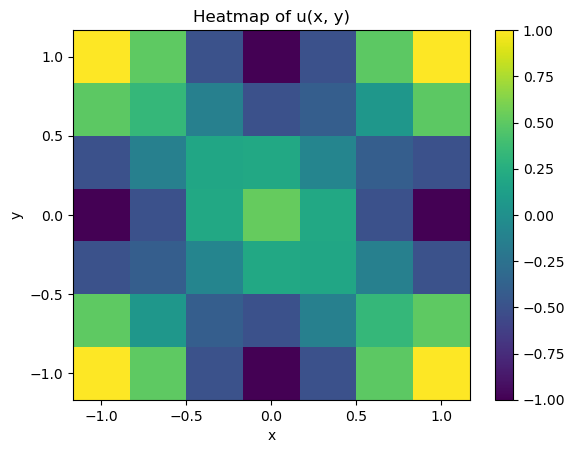

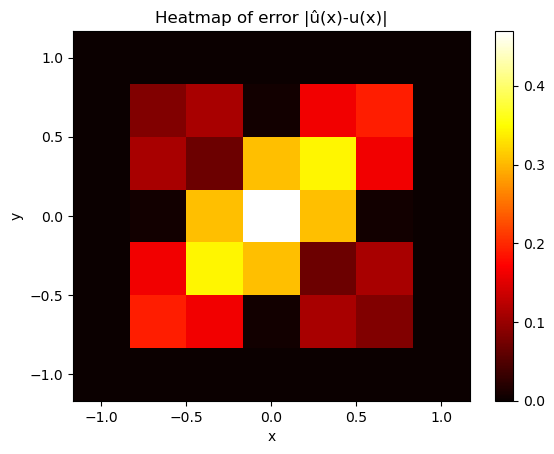

In [8]:
plot_heatmap(u,VX,VY,ufun)

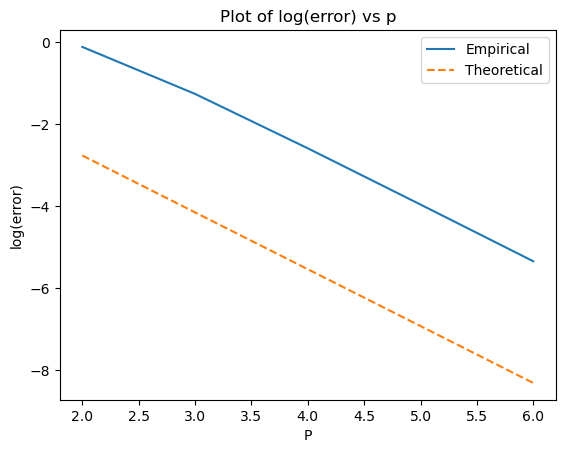

In [9]:
ufun = lambda x,y: np.cos(np.pi*x)*np.cos(np.pi*y)
P = list(range(2,7))
error = np.zeros(len(P))

for i,p in enumerate(P):
    noelms1 = 2**p
    noelms2 = 2**p

    VX, VY, EToV, u = Driver28c(x0, y0, L1, L2, noelms1, noelms2, lam1, lam2, f, qt)
    u_exact = ufun(VX,VY)
    error[i] = np.linalg.norm(u-u_exact, np.inf)

DOF = [(2**p+1)**2 for p in P]

#plt.loglog(DOF,error,'r--')
#plt.semilogy(P,error)
plt.plot(P,np.log(error), label='Empirical')
plt.plot(P,-2*np.log(2)*np.array(P),'--', label='Theoretical')
plt.title(r"Plot of log(error) vs p")
plt.legend()
plt.xlabel('P')
plt.ylabel('log(error)')
plt.show()

*d)* Compute approximations for differing meshes.

In [10]:
P = list(range(1,7))
zero_1 = np.zeros(len(P))
zero_2 = np.zeros(len(P))

x0 = 0
y0 = 0

L1 = 1
L2 = 1

lam1 = 1
lam2 = 1

for i, p in enumerate(P):
    noelms1 = 2**p
    noelms2 = 2**p

    VX, VY, EToV, u1 = Driver28b(x0, y0, L1, L2, noelms1, noelms2, lam1, lam2, f, qt)

    zero_1[i] = u1[noelms1]

    VX, VY, EToV, u2 = Driver28c(x0-1, y0-1, L1+1, L2+1, noelms1*2, noelms2*2, lam1, lam2, f, qt)

    zero_2[i] = u2[int(len(u2)/2)]

print(zero_1)
print(zero_2)

[-0.36292216  0.54719116  0.86695986  0.96310108  0.99000096  0.99731805]
[0.11685028 0.71905726 0.92545767 0.98108619 0.99525401 0.99881241]
